#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

*Enter your answer in this cell*

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)
num_rows = 1000
categories = [f'Category_{i}' for i in range(1, 11)]
df = pd.DataFrame({
    'Category': np.random.choice(categories, num_rows),
    'Value_1': np.random.normal(loc=50, scale=15, size=num_rows),
    'Value_2': np.random.uniform(low=20, high=80, size=num_rows)
})

           Value_1      Value_2
count  1000.000000  1000.000000
mean     50.156663    50.435692
std      15.363112    17.497011
min      -3.523079    20.011304
25%      40.271307    35.236186
50%      50.410394    51.349516
75%      60.953650    65.654770
max      97.129505    79.982828


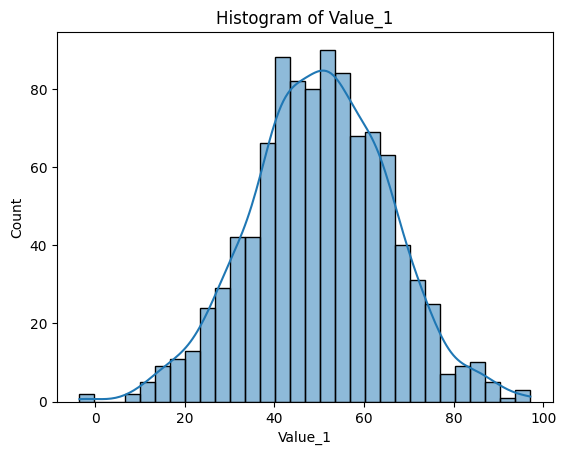

In [ ]:
print(df.describe())
sns.histplot(df['Value_1'], bins=30, kde=True)
plt.title('Histogram of Value_1')
plt.show()

Category
Category_1     118
Category_3     110
Category_10    107
Category_5     107
Category_8     100
Category_6      96
Category_4      94
Category_7      94
Category_9      91
Category_2      83
Name: count, dtype: int64


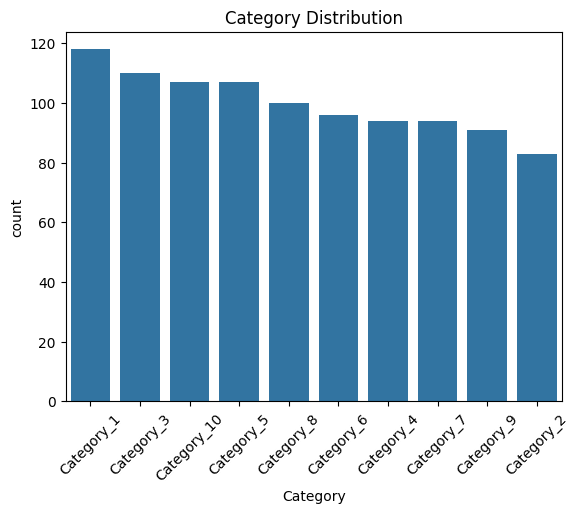

In [17]:
print(df['Category'].value_counts())  # Frequency counts
sns.countplot(x=df['Category'], order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

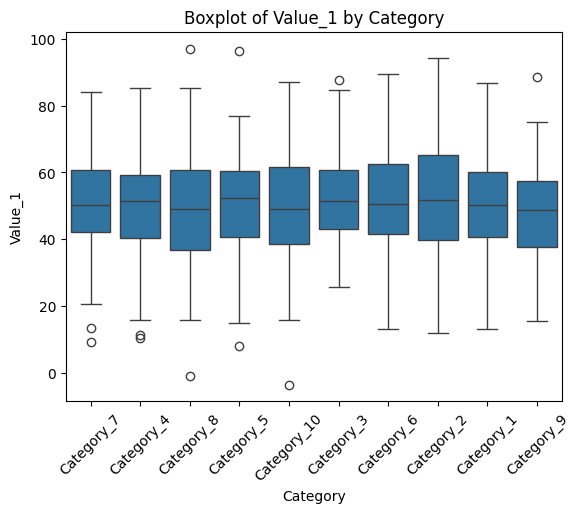

In [18]:
sns.boxplot(x='Category', y='Value_1', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Value_1 by Category')
plt.show()

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [ ]:
np.random.seed(42)
num_rows = 1000
categories = ['A', 'B', 'C', 'D', 'E']
cat_column = np.random.choice(categories, num_rows)

In [ ]:
num_col1 = np.random.normal(loc=100, scale=10, size=num_rows)
num_col2 = np.random.normal(loc=0, scale=1, size=num_rows)
num_col3 = np.random.normal(loc=5000, scale=1000, size=num_rows)
num_col4 = np.random.normal(loc=50, scale=25, size=num_rows)

missing_indices = np.random.choice(num_rows, size=int(0.05 * num_rows), replace=False)
cat_column[missing_indices] = None  # For categorical column
num_col1[missing_indices] = np.nan
num_col2[missing_indices] = np.nan
num_col3[missing_indices] = np.nan
num_col4[missing_indices] = np.nan

probability = (num_col1 / 200) + (num_col2 * 0.5) + (num_col3 / 10000) + np.random.rand(num_rows) * 0.2
target = (probability > 0.5).astype(int)

df = pd.DataFrame({
    'Category': cat_column,
    'Num1': num_col1,
    'Num2': num_col2,
    'Num3': num_col3,
    'Num4': num_col4,
    'Target': target
})

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1000 non-null   object 
 1   Num1      950 non-null    float64
 2   Num2      950 non-null    float64
 3   Num3      950 non-null    float64
 4   Num4      950 non-null    float64
 5   Target    1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB
None
  Category        Num1      Num2         Num3       Num4  Target
0        D  101.093948  0.298753  4265.826201  25.354905       1
1        E  107.257666 -0.751791  5081.995556  42.896123       1
2        N         NaN       NaN          NaN        NaN       0
3        N         NaN       NaN          NaN        NaN       0
4        N         NaN       NaN          NaN        NaN       0


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [ ]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df, classifier):
    y = df["Target"].astype(int)  # <-- use the correct column name from your df
    X = df.drop(columns=["Target"])

    categorical_features = X.select_dtypes(include=["object", "category"]).columns
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df, LogisticRegression(random_state=42, max_iter=1000))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))


F1 (5-fold): mean=0.988, std=0.005
Fold scores: [0.991 0.994 0.982 0.982 0.988]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [ ]:
# Your code here


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

*Enter your answer in this cell*